In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

In [12]:
match_data = pd.read_csv('..\\Data\\matchData2.csv')

In [13]:
game_duration = match_data['gameDuration']
match_data = match_data.drop(['gameDuration'], axis=1)
match_data = match_data.drop(['firstBaronTeam1'], axis=1)
match_data = match_data.drop(['firstBaronTeam2'], axis=1)
match_data = match_data.drop(['win_team1'], axis=1)
match_data = match_data.drop(['win_team2'], axis=1)

In [14]:
# Elimina algunas columnas que no son determinantes
match_data = match_data.drop(['ban1Team1'], axis=1)
match_data = match_data.drop(['ban1Team2'], axis=1)
match_data = match_data.drop(['ban2Team1'], axis=1)
match_data = match_data.drop(['ban2Team2'], axis=1)
match_data = match_data.drop(['ban3Team1'], axis=1)
match_data = match_data.drop(['ban3Team2'], axis=1)
match_data = match_data.drop(['ban4Team1'], axis=1)
match_data = match_data.drop(['ban4Team2'], axis=1)
match_data = match_data.drop(['ban5Team1'], axis=1)
match_data = match_data.drop(['ban5Team2'], axis=1)
match_data = match_data.drop(['champ1Team1'], axis=1)
match_data = match_data.drop(['champ1Team2'], axis=1)
match_data = match_data.drop(['champ2Team1'], axis=1)
match_data = match_data.drop(['champ2Team2'], axis=1)
match_data = match_data.drop(['champ3Team1'], axis=1)
match_data = match_data.drop(['champ3Team2'], axis=1)
match_data = match_data.drop(['champ4Team1'], axis=1)
match_data = match_data.drop(['champ4Team2'], axis=1)
match_data = match_data.drop(['champ5Team1'], axis=1)
match_data = match_data.drop(['champ5Team2'], axis=1)



In [15]:
X_train, X_test, y_train, y_test = train_test_split(match_data, game_duration, test_size=0.2, random_state=42)

In [46]:
# Escala de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Regularización L1 (Lasso)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Regularización L2 (Ridge)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

In [53]:
y_test_pred_lasso = lasso_model.predict(X_test_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

print(f"Lasso MSE en conjunto de prueba: {mse_lasso}")
print(f"Ridge MSE en conjunto de prueba: {mse_ridge}")

Lasso MSE en conjunto de prueba: 141151.8719220136
Ridge MSE en conjunto de prueba: 141149.04013784617


In [16]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [17]:
test_predictions = rf.predict(X_test)
train_predictions = rf.predict(X_train)

# Métricas de evaluación para conjunto de prueba

In [18]:
# mean squared error
mse = mean_squared_error(y_test, test_predictions)
print(f'Mean Squared Error: {mse}')
# root mean squared error
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')
# Mean Absolute Error
mae = sum(abs(y_test - test_predictions)) / len(test_predictions)
print(f'Mean Absolute Error: {mae}')
# coefficient of determination
r2 = rf.score(X_test, y_test)
print(f'Coefficient of Determination: {r2}')

Mean Squared Error: 114624.93244627932
Root Mean Squared Error: 338.5630405792684
Mean Absolute Error: 268.18130008319866
Coefficient of Determination: 0.38336489463690004


# Métricas de evaluación para conjunto de entrenamiento

In [19]:
# mean squared error
mse = mean_squared_error(y_train, train_predictions)
print(f'Mean Squared Error: {mse}')
# root mean squared error
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')
# Mean Absolute Error
mae = sum(abs(y_train - train_predictions)) / len(train_predictions)
print(f'Mean Absolute Error: {mae}')
# coefficient of determination
r2 = rf.score(X_train, y_train)
print(f'Coefficient of Determination: {r2}')

Mean Squared Error: 18570.77260758429
Root Mean Squared Error: 136.27462202326703
Mean Absolute Error: 103.66732969702
Coefficient of Determination: 0.8988363831305626


In [27]:
# calcula la media de la duracion de las partidas
mean_duration = game_duration.mean()
print(f'Mean Duration: {mean_duration}')

Mean Duration: 1471.433468215402


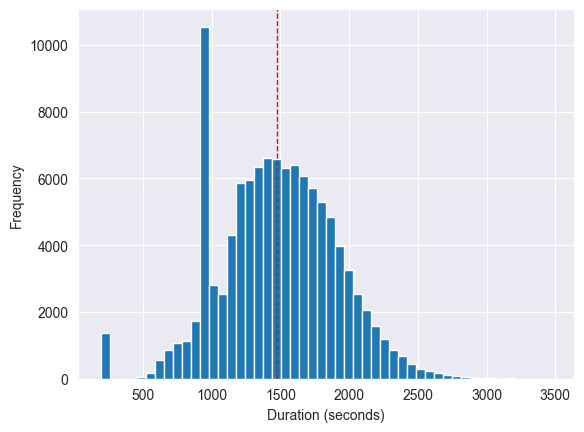

In [10]:
# grafica la distribucion de la duracion de las partidas
plt.ylabel('Frequency')
plt.xlabel('Duration (seconds)')
plt.hist(game_duration, bins=50)
plt.axvline(mean_duration, color='r', linestyle='dashed', linewidth=1)
plt.show()

                    Feature  Importance
30         goldPerMin0-10T1    0.125555
34         goldPerMin0-10T2    0.119106
29           xpPerMin0-10T1    0.080284
33           xpPerMin0-10T2    0.055349
17     firstRiftHeraldTeam2    0.037495
31  damageTakenPerMin0-10T1    0.030025
35  damageTakenPerMin0-10T2    0.027213
3      firstRiftHeraldTeam1    0.023785
24              champ2Team2    0.022402
2          firstDragonTeam1    0.022267
12              champ4Team1    0.021971
23              champ1Team2    0.021966
11              champ3Team1    0.021947
9               champ1Team1    0.021850
25              champ3Team2    0.021846
13              champ5Team1    0.021697
27              champ5Team2    0.021688
26              champ4Team2    0.021650
10              champ2Team1    0.021358
28       creepsPerMin0-10T1    0.021006
32       creepsPerMin0-10T2    0.020504
5                 ban2Team1    0.019358
4                 ban1Team1    0.019318
18                ban1Team2    0.019220


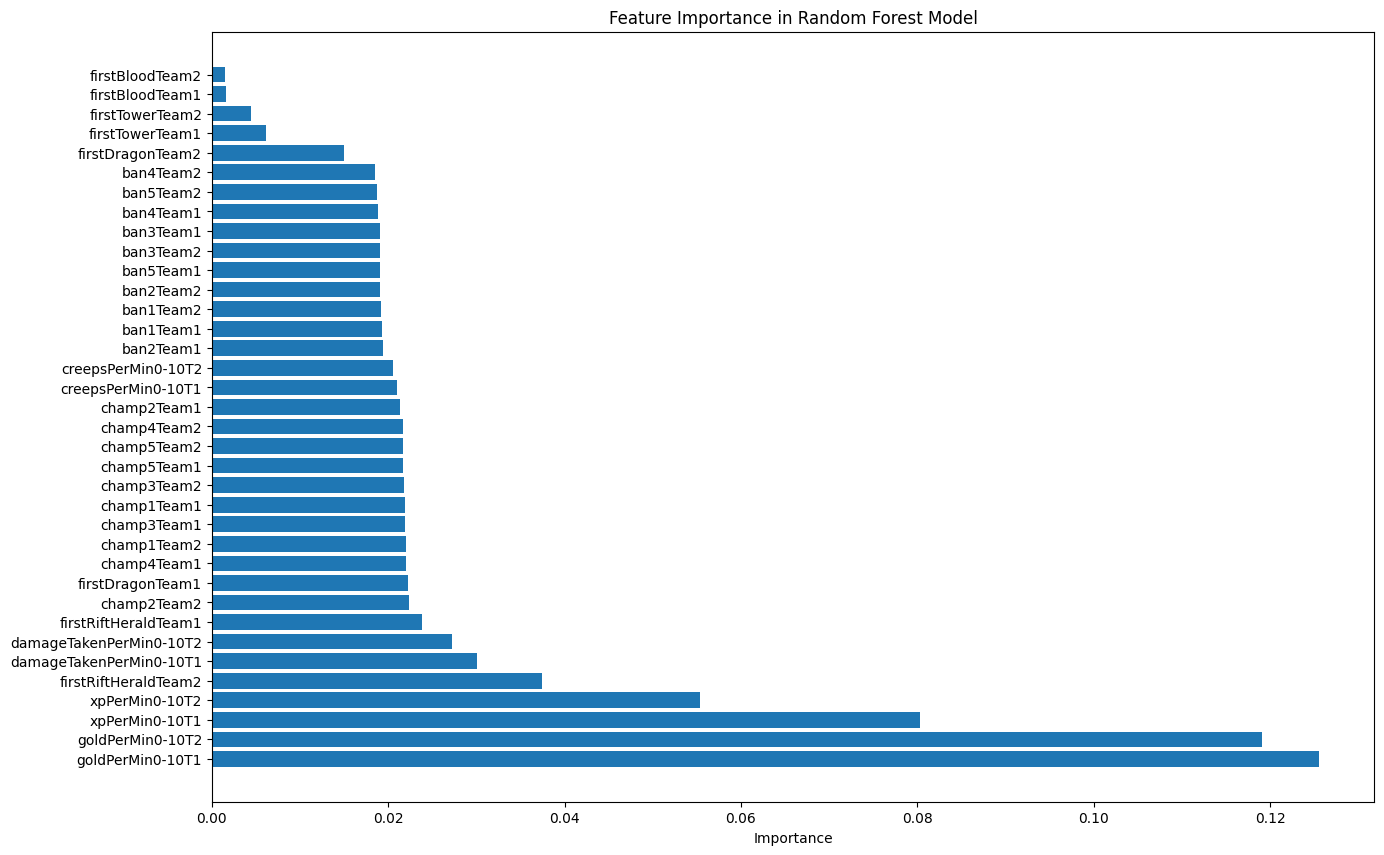

In [11]:
# Obtiene la importancia de cada característica
importances = rf.feature_importances_

# Obtiene los nombres de las características
feature_names = X_train.columns

# Crea un DataFrame con las importancias y los nombres de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordena el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Muestra o guarda la importancia de cada característica
print(feature_importance_df)

# Visualiza la importancia de cada característica
plt.figure(figsize=(15, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()

## Resultados con todos los features: 


### Train:
Mean Squared Error: 16096.18018732542
Root Mean Squared Error: 126.87072234099331
Mean Absolute Error: 99.8030237888236
Coefficient of Determination: 0.9123166364727873

### Test:
Mean Squared Error: 114290.96798984779
Root Mean Squared Error: 338.06947213531095
Mean Absolute Error: 268.80591518764373
Coefficient of Determination: 0.38516148638517167

## Resultados con los features: 
- goldPerMin0-10T1
- goldPerMin0-10T2
- xpPerMin0-10T1
- xpPerMin0-10T2
- damageTakenPerMin0-10T1
- damageTakenPerMin0-10T2
- creepsPerMin0-10T2
- creepsPerMin0-10T1
- firstRiftHeraldTeam2
- firstRiftHeraldTeam1
- firstDragonTeam1
- firstDragonTeam2

### Train:
Mean Squared Error: 18570.77260758429
Root Mean Squared Error: 136.27462202326703
Mean Absolute Error: 103.66732969702
Coefficient of Determination: 0.8988363831305626

### Test:
Mean Squared Error: 114624.93244627932
Root Mean Squared Error: 338.5630405792684
Mean Absolute Error: 268.18130008319866
Coefficient of Determination: 0.38336489463690004